# Lab 07
Hao-Tien Kuo
## Predicting customer spending

In [1]:
import numpy as np
import pandas as pd
import statistics
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('lab07_customers.csv')

In [2]:
df.head()

,spend,race,income,age,sex,schoolYears
0,715.243646,white,38511.0,34.0,male,0.0
1,883.720255,other,280882.0,38.0,male,0.0
2,755.915697,white,160952.0,48.0,female,0.0
3,652.697972,white,73221.0,32.0,male,0.0
4,575.359129,white,17415.0,29.0,male,0.0


In [3]:
df.isnull().sum()

spend          0
race           0
income         0
age            0
sex            0
schoolYears    0
dtype: int64

In [4]:
df.describe()

,spend,income,age,schoolYears
count,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,756.861198,8.709950e+04,42.155800,0.033500
std,116.043318,1.170732e+05,8.961727,0.179947
min,387.788533,9.020000e+02,21.000000,0.000000
25%,694.164616,2.668075e+04,34.000000,0.000000
50%,762.080140,5.241100e+04,43.000000,0.000000
75%,820.094031,1.025250e+05,50.000000,0.000000
max,1372.150816,2.100000e+06,65.000000,1.000000


In [5]:
df['race'].value_counts()

white       5702
hispanic    1350
black       1168
other       1131
asian        649
Name: race, dtype: int64

In [6]:
df['sex'].value_counts()

female    5105
male      4883
other       12
Name: sex, dtype: int64

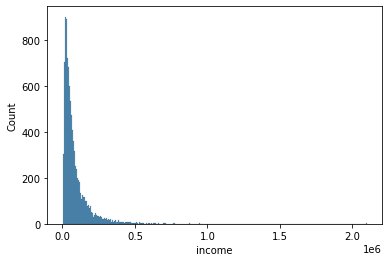

In [7]:
# Transform Income so that it looks more normal

sns.histplot(data=df, x='income')
plt.show()

# Income seems to be right-skewed

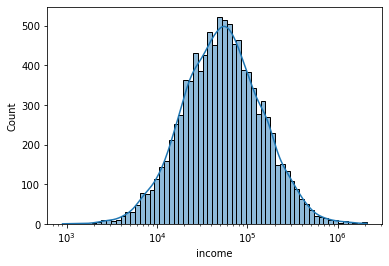

In [8]:
sns.histplot(data=df, x='income', kde=True, log_scale=True)
plt.show()

# Log transformation would make the distribution more normal

In [9]:
df['income'] = np.log(df['income'])

In [10]:
# Compute average spending by race

df.groupby('race')['spend'].mean()

race
asian       818.565036
black       648.428084
hispanic    824.617968
other       751.173088
white       757.135785
Name: spend, dtype: float64

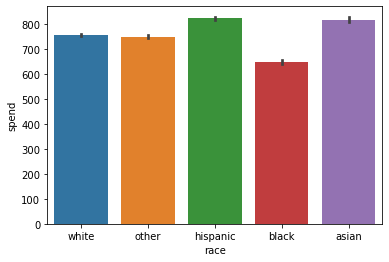

In [11]:
sns.barplot(data=df, x='race', y='spend')
plt.show()

In [12]:
# Compute average spending by sex

df.groupby('sex')['spend'].mean()

sex
female    756.432118
male      757.865659
other     530.667378
Name: spend, dtype: float64

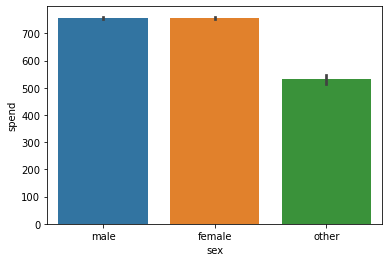

In [13]:
sns.barplot(data=df, x='sex', y='spend')
plt.show()

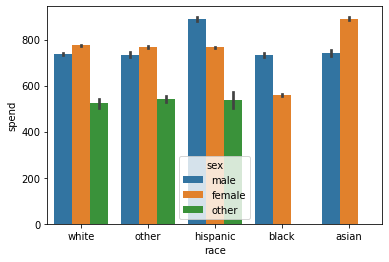

In [14]:
# We have reason to believe that groups of Hispanic Men and Black Women spend differently from other groups, and from each other. 
# Hint you may want to dummy code the variables to make interpretation easier.

sns.barplot(data=df, x='race', y='spend', hue='sex')
plt.show()

In [15]:
df_2 = pd.get_dummies(df)

df_2.head()

,spend,income,age,schoolYears,race_asian,race_black,race_hispanic,race_other,race_white,sex_female,sex_male,sex_other
0,715.243646,10.558699,34.0,0.0,0,0,0,0,1,0,1,0
1,883.720255,12.545690,38.0,0.0,0,0,0,1,0,0,1,0
2,755.915697,11.988861,48.0,0.0,0,0,0,0,1,1,0,0
3,652.697972,11.201238,32.0,0.0,0,0,0,0,1,0,1,0
4,575.359129,9.765087,29.0,0.0,0,0,0,0,1,0,1,0


In [16]:
df_2['hispanic_men'] = df_2['race_hispanic'] * df_2['sex_male']
df_2['black_women'] = df_2['race_black'] * df_2['sex_female']

df_2.head()

,spend,income,age,schoolYears,race_asian,race_black,race_hispanic,race_other,race_white,sex_female,sex_male,sex_other,hispanic_men,black_women
0,715.243646,10.558699,34.0,0.0,0,0,0,0,1,0,1,0,0,0
1,883.720255,12.545690,38.0,0.0,0,0,0,1,0,0,1,0,0,0
2,755.915697,11.988861,48.0,0.0,0,0,0,0,1,1,0,0,0,0
3,652.697972,11.201238,32.0,0.0,0,0,0,0,1,0,1,0,0,0
4,575.359129,9.765087,29.0,0.0,0,0,0,0,1,0,1,0,0,0


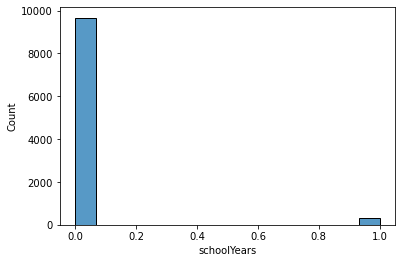

In [17]:
# We also believe that Asian Women with Higher education are great customers (spend more).

sns.histplot(data=df_2, x='schoolYears')
plt.show()

In [18]:
df_2['schoolYears'].value_counts()

0.0    9665
1.0     335
Name: schoolYears, dtype: int64

In [19]:
df_2['asian_women_high_edu'] = df_2['race_asian'] * df_2['sex_female'] * df_2['schoolYears']

df_2.head()

,spend,income,age,schoolYears,race_asian,race_black,race_hispanic,race_other,race_white,sex_female,sex_male,sex_other,hispanic_men,black_women,asian_women_high_edu
0,715.243646,10.558699,34.0,0.0,0,0,0,0,1,0,1,0,0,0,0.0
1,883.720255,12.545690,38.0,0.0,0,0,0,1,0,0,1,0,0,0,0.0
2,755.915697,11.988861,48.0,0.0,0,0,0,0,1,1,0,0,0,0,0.0
3,652.697972,11.201238,32.0,0.0,0,0,0,0,1,0,1,0,0,0,0.0
4,575.359129,9.765087,29.0,0.0,0,0,0,0,1,0,1,0,0,0,0.0


In [20]:
# Fit a model to test the hypotheses in steps 4 and 5, report parameter estimates and R2

lm1 = sm.OLS.from_formula(formula="spend ~ race_hispanic + sex_male + race_black + sex_female + hispanic_men + black_women + race_asian + schoolYears + asian_women_high_edu", data=df_2).fit()
lm1.summary()

# parameter estimates: all the variables are statistically significant, except for race_hispanic, race_black, and race_asian
# R2: 0.317, indicating that these variables can explain roughly 31.7% of the variation in spending

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     579.5
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:18:59   Log-Likelihood:                -59823.
No. Observations:               10000   AIC:                         1.197e+05
Df Residuals:                    9991   BIC:                         1.197e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              531.9244     27.705     19.200      0.000     477.617     586.232
race_hispanic           -7.5419      3.960     -1.905      0.057     -15.304       0.221
sex_male               206.5115     27.755      7.441      0.000     152.106     260.916
race_black              -5.6772      4.259     -1.333      0.183     -14.025       2.671
sex_female             241.7025     27.737      8.714      0.000     187.333     296.072
hispanic_men           158.4514      5.720     27.700      0.000     147.238     169.664
black_women           -208.2984      6.078    -34.269      0.000    -220.213    -196.384
race_asian               2.9929      5.664      0.528      0.597      -8.110      14.096
schoolYears             57.1231      3.943     14.487      0.000      49.394      64.853
asian_women_high_edu    57.1231      3.943     14.487      0.000      49.394      64.853
==============================================================================
Omnibus:                      694.084   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1832.868
Skew:                           0.396   Prob(JB):                         0.00
Kurtosis:                       4.942   Cond. No.                     6.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
# Of course income, and age probably play a factor in spending, so let’s include those, report parameter estimates and R2

lm2 = sm.OLS.from_formula(formula="spend ~ income + age + race_hispanic + sex_male + race_black + sex_female + hispanic_men + black_women + race_asian + schoolYears + asian_women_high_edu", data=df_2).fit()
lm2.summary()

# parameter estimates: all the variables are statistically significant, except for race_hispanic and race_asian
# R2: 0.864, indicating that these variables can explain roughly 86.4% of the variation in spending

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     6357.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:19:07   Log-Likelihood:                -51745.
No. Observations:               10000   AIC:                         1.035e+05
Df Residuals:                    9989   BIC:                         1.036e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -243.0146     13.524    -17.969      0.000    -269.524    -216.505
income                  16.7252      0.427     39.176      0.000      15.888      17.562
age                     20.7167      0.105    196.694      0.000      20.510      20.923
race_hispanic           -2.9941      1.766     -1.695      0.090      -6.456       0.468
sex_male                95.1657     12.389      7.681      0.000      70.881     119.451
race_black              -4.7053      1.899     -2.478      0.013      -8.428      -0.983
sex_female            -201.1800     12.570    -16.004      0.000    -225.820    -176.540
hispanic_men           151.0466      2.551     59.207      0.000     146.046     156.047
black_women           -209.5992      2.711    -77.326      0.000    -214.913    -204.286
race_asian               4.2682      2.526      1.690      0.091      -0.683       9.220
schoolYears             57.5775      1.758     32.744      0.000      54.131      61.024
asian_women_high_edu    57.5775      1.758     32.744      0.000      54.131      61.024
==============================================================================
Omnibus:                      478.162   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.330
Skew:                           0.481   Prob(JB):                    7.29e-136
Kurtosis:                       3.753   Cond. No.                     1.78e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.24e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Describe the findings from your model:
- R2 increases from 0.31 to 0.86 by including income and age into the model, meaning that those two variables can explain a large amount of variation in spending.
- In the second model, race_black shows a smaller p-value and is now significant. However, race_hispanic and race_asian are still insignificant.
- We can accept all three of our H1 hypothesis, since hispanic_men, black_women, and asian_women_high_edu are all significant. Interactions exist between those variables chosen.
    - Hispanic Men and Black Women spend differently from the baseline and from each other. 
        - Hispanic Men spend even more than average men. 
        - Black Women spend even less than average women.
    - Asian Women with Higher education spend more that the baseline.